In [ ]:
!pip install langchain
!pip install openai
!pip install langchain-community langchain
!pip install langgraph
!pip install -U langchain langchain-openai

In [3]:
import os

os.environ["OPENAI_API_KEY"] = 'OPENAI_API_KEY'
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_API_KEY"] = 'LANGCHAIN_API_KEY'
os.environ["LANGCHAIN_PROJECT"] = "Langgraph Agents"
os.environ["LANGSMITH_ENDPOINT"] = "https://api.smith.langchain.com"

In [14]:
from langchain.chat_models import ChatOpenAI
from typing import TypedDict, List
from langgraph.graph import START, END, StateGraph
from langchain_core.messages import HumanMessage


In [15]:
class AgentState(TypedDict):
  messages: List[HumanMessage]

In [ ]:
llm = ChatOpenAI(model="gpt-4o")

In [29]:
def processes(state: AgentState) -> AgentState:
  response = llm.invoke(state['messages'])
  print(f"\nAI: {response}")
  return state

In [30]:
graph = StateGraph(AgentState)

graph.add_node("chat", processes)

graph.add_edge(START,"chat")
graph.add_edge("chat", END)

app = graph.compile()

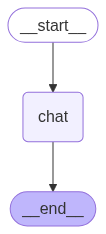

In [31]:
app

In [32]:
result = app.invoke({"messages":[HumanMessage(content="Hi, what is the capital of India?")]})


AI: content='The capital of India is New Delhi.' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 16, 'total_tokens': 24, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o', 'system_fingerprint': 'fp_07871e2ad8', 'finish_reason': 'stop', 'logprobs': None} id='run--f2fb275d-452c-49d6-b497-105069af027e-0'


In [33]:
result

{'messages': [HumanMessage(content='Hi, what is the capital of India?', additional_kwargs={}, response_metadata={})]}

In [34]:
user_input = input("Enter: ")
while user_input != "exit":
    app.invoke({"messages": [HumanMessage(content=user_input)]})
    user_input = input("Enter: ")

Enter: Hi

AI: content='Hello! How can I assist you today?' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o', 'system_fingerprint': 'fp_a288987b44', 'finish_reason': 'stop', 'logprobs': None} id='run--d96c6bc3-487c-489d-8e9c-3fdee4b4b482-0'
Enter: What is the capital of India

AI: content='The capital of India is New Delhi.' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 13, 'total_tokens': 21, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o', 'system_fingerprint': 

KeyboardInterrupt: Interrupted by user